**CAPSTONE MODUL 3 : BIKE SHARING - ALIFIA LISTU SAMATHA - JCDS BANDUNG**

****
# **Contents**
****
1. [Business Understanding](#business-understanding)
2. [Data Understanding](#data-understanding)
3. [Exploratory Data Analysis](#exploratory-data-analysis)
4. [Data Preprocessing](#data-preprocessing)
5. [Modeling](#modeling)
6. [Conclusion](#conclusion)
7. [Recommendation](#recommendation)

****
# **Business Understanding**
****

**Context**

Perusahaan Capital Bikeshare adalah perusahaan yang membuat sistem berbagi sepeda di Washington, D.C. Sistem berbagi sepeda adalah generasi baru persewaan sepeda tradisional di mana seluruh proses, mulai dari keanggotaan hingga persewaan hingga pengembalian, dilakukan secara otomatis. Pengguna dapat dengan mudah menyewa sepeda dari satu lokasi dan mengembalikannya ke lokasi lain menggunakan sistem ini. Saat ini terdapat lebih dari 500 program berbagi sepeda di seluruh dunia, dengan lebih dari 500 ribu sepeda. Sistem ini saat ini mendapatkan popularitas karena pentingnya masalah lalu lintas, lingkungan, dan kesehatan.

Selain aplikasi dari perusahaan Capital Bikeshare yang menarik, karakteristik data yang dihasilkan oleh sistem berbagi sepeda membuatnya menarik untuk penelitian. Berbeda dengan jenis transportasi lain seperti bus atau kereta bawah tanah, durasi perjalanan, posisi keberangkatan dan kedatangan dicatat secara eksplisit dalam sistem ini. Fitur ini mengubah sistem berbagi sepeda menjadi jaringan sensor virtual yang dapat digunakan untuk memonitor mobilitas kota. Akibatnya, pemantauan data ini diharapkan dapat mendeteksi peristiwa terpenting di kota.

**Stakeholders**

**Tim Operasional** di Perusahaan Capital Bikeshare

**Problem Statement**

Berbagi sepeda (*bike-sharing*) muncul sebagai sarana transportasi alternatif yang secara komprehensif dapat memperbaiki masalah lingkungan, kemacetan lalu lintas, kualitas hidup yang buruk yang disebabkan oleh sistem transportasi yang berorientasi pada mobil, dan dapat menjamin efek praktis. Namun, meskipun banyak keuntungannya, jumlah kota dan bisnis yang enggan memperkenalkan program sepeda bersama semakin meningkat karena kerugian dari biaya tetap yang tinggi seperti biaya pemasangan atau biaya operasional. Dengan demikian, **prediksi permintaan yang akurat diperlukan untuk pengoperasian program bike sharing yang berkelanjutan**.

**Goals**

Berdasarkan permasalahan tersebut, Perusahaan Capital Bikeshare tentu perlu memiliki *tool* yang dapat memprediksi dan membantu Tim Operasional dalam **menentukan jumlah sepeda yang harus disediakan pada waktu tertentu**. Adanya perbedaan pada berbagai fitur yang terdapat pada suatu atribut, seperti suhu, cuaca, dan musim dapat menambah keakuratan prediksi jumlah sepeda.

Bagi Perusahaan Capital Bikeshare, *prediction tool* yang dapat memberikan prediksi jumlah sepeda pada waktu serta memahami pola yang telah ditetapkan yang diikuti orang (*User Capital Bikeshare*) dapat membantu mengoptimalkan sistem berbagi sepeda, memaksa operator untuk mengantisipasi kepadatan sepeda atau kekurangan sepeda di stasiun tertentu dan mengoptimalkan redistribusinya sebagai respons terhadap situasi tersebut.

**Analytic Approach**

Jadi, kita perlu menganalisis data untuk mengidentifikasi pola di antara fitur-fitur yang ada yang membedakan satu pola sewa dari yang lain. Selanjutnya akan **dibuat model regresi** yang akan membantu perusahaan dalam menyediakan '*tool*' untuk memprediksi jumlah sepeda yang dibutuhkan pada waktu tertentu, yang akan berguna bagi Tim Operasional dalam mengoptimalkan pendistribusian sepeda pada waktu yang tepat sehingga dapat meningkatkan kepuasan pelanggan terhadap sistem.

**Metric Evaluation**

Evaluasi  metrik yang akan digunakan adalah RMSE, MAE, dan MAPE.

- **RMSE** adalah rata-rata akar kuadrat dari *error*.
- **MAE** adalah nilai absolut rata-rata dari *error*.
- **MAPE** adalah rata-rata proporsi *error* yang dihasilkan oleh model regresi.
- Semakin **rendah** nilai RMSE, MAE, dan MAPE, semakin **baik** model memprediksi jumlah sepeda berdasarkan batasan fitur yang digunakan.

Selain itu, jika model yang akan digunakan sebagai **model akhir adalah model linear**, kita dapat menggunakan R-squared atau Adjusted R-squared. Nilai R-squared digunakan untuk mengetahui seberapa baik model dapat merepresentasikan varians keseluruhan data. Semakin mendekati 1, maka semakin fit pula modelnya terhadap data observasi. Namun, metrik ini tidak valid untuk model non-linear.

[Sumber Data Bike Sharing](https://drive.google.com/drive/folders/1IdIJxkD-lldkCeKAWh12_50Cdsya3cwc?usp=sharing)

****
# **Data Understanding**
****

Data ini mencakup jumlah sepeda sewaan per jam dan harian dalam sistem *Capital Bikeshare* antara 2011 dan 2012, serta data cuaca dan musiman.

| Attribute  | Data Type | Description                                                                                                                                                                                                                                                                 |
|------------|-----------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| dteday     | Object    | Date                                                                                                                                                                                                                                                                        |
| hum        | Float     | Normalized Humidity. The values are divided into 100 (max)                                                                                                                                                                                                                  |
| weathersit | Integer   | 1: Clear, Few clouds, Partly cloudy, Partly cloudy <br>2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist <br>3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds <br>4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog |
| holiday    | Integer   | Holiday or Not                                                                                                                                                                                                                                                              |
| season     | Integer   | Season (1: Winter, 2: Spring, 3: Summer, 4: Fall)                                                                                                                                                                                                                           |
| atemp      | Float     | Normalized feeling temperature in Celsius. <br>The values are derived via (t-tmin)/(tmax-tmin), tmin=-16, t_max=+50 (only in hourly scale)                                                                                                                                      |
| temp       | Float     | Normalized temperature in Celsius. <br>The values are derived via (t-tmin)/(tmax-tmin), tmin=-8, t_max=+39 (only in hourly scale)                                                                                                                                               |
| hr         | Integer   | Hour (0 to 23)                                                                                                                                                                                                                                                              |
| casual     | Integer   | Count of Casual Users                                                                                                                                                                                                                                                       |
| registered | Integer   | Count of Registered Users                                                                                                                                                                                                                                                   |
| cnt        | Integer   | Count of Total Rental Bikes Including Both Casual and Registered                                                                                                                                                                                                            |

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('data_bike_sharing.csv')
df.head()

,dteday,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
0,2011-12-09,0.62,1,0,4,0.3485,0.36,16,24,226,250
1,2012-06-17,0.64,1,0,2,0.5152,0.54,4,2,16,18
2,2011-06-15,0.53,1,0,2,0.6212,0.62,23,17,90,107
3,2012-03-31,0.87,2,0,2,0.3485,0.36,8,19,126,145
4,2012-07-31,0.55,1,0,3,0.6970,0.76,18,99,758,857


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12165 entries, 0 to 12164
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      12165 non-null  object 
 1   hum         12165 non-null  float64
 2   weathersit  12165 non-null  int64  
 3   holiday     12165 non-null  int64  
 4   season      12165 non-null  int64  
 5   atemp       12165 non-null  float64
 6   temp        12165 non-null  float64
 7   hr          12165 non-null  int64  
 8   casual      12165 non-null  int64  
 9   registered  12165 non-null  int64  
 10  cnt         12165 non-null  int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 1.0+ MB


In [5]:
df.isna().sum()

dteday        0
hum           0
weathersit    0
holiday       0
season        0
atemp         0
temp          0
hr            0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.describe()

,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
count,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000
mean,0.625451,1.416934,0.029758,2.488615,0.476996,0.498185,11.519770,35.834443,153.436580,189.271023
std,0.192102,0.635937,0.169925,1.106157,0.171857,0.192492,6.931872,49.489286,151.046123,181.223903
min,0.000000,1.000000,0.000000,1.000000,0.000000,0.020000,0.000000,0.000000,0.000000,1.000000
25%,0.470000,1.000000,0.000000,2.000000,0.333300,0.340000,6.000000,4.000000,34.000000,40.000000
50%,0.620000,1.000000,0.000000,2.000000,0.484800,0.500000,12.000000,17.000000,115.000000,142.000000
75%,0.780000,2.000000,0.000000,3.000000,0.621200,0.660000,18.000000,49.000000,220.000000,282.000000
max,1.000000,4.000000,1.000000,4.000000,1.000000,1.000000,23.000000,362.000000,876.000000,970.000000


**Penjelasan**
***
- Ada 12.165 baris dan 11 kolom pada dataset.
- Ada 6 kolom numerikal ('hum', 'atemp', 'temp', 'casual', 'registered', 'cnt') dan 5 kolom kategorikal ('dteday', 'weathersit', 'holiday', 'season', 'hr').
- Data **tidak ada** *missing value* maupun *duplicated value*.
- Nilai min/maks masih dalam batas wajar mean/median pada variabel untuk masing-masing kolom.
- Beberapa fitur yang seharusnya kategorikal masih bertipe numerik (float/int).

***
# **Exploratory Data Analysis**
***

### **Rename Column & Add Column in DataFrame**

Membuat dataframe baru bernama df_visual untuk mempermudah visualisasi.

In [8]:
df_visual = df.copy()
df_visual.head()

,dteday,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
0,2011-12-09,0.62,1,0,4,0.3485,0.36,16,24,226,250
1,2012-06-17,0.64,1,0,2,0.5152,0.54,4,2,16,18
2,2011-06-15,0.53,1,0,2,0.6212,0.62,23,17,90,107
3,2012-03-31,0.87,2,0,2,0.3485,0.36,8,19,126,145
4,2012-07-31,0.55,1,0,3,0.6970,0.76,18,99,758,857


Mengubah angka pada kolom kategorikal sesuai dengan deskripsi data untuk mempermudah analisis visual. Disini juga mengubah kolom `dteday` menjadi datetime dan mengektrasi data day_name dari kolom tersebut.

In [9]:
df_visual['season'].replace({1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'}, inplace=True)
df_visual['weathersit'].replace({1: 'Clear', 2: 'Mist', 3: 'Light Rain/Snow', 4: 'Heavy Rain/Snow'}, inplace=True)
df_visual['holiday'].replace({1:'Yes', 0:'No'}, inplace=True)
df_visual['dteday'] = pd.to_datetime(df_visual['dteday'])
df_visual['day'] = df_visual['dteday'].dt.day_name()

Mengubah nama kolom agar lebih mudah dimengerti.

In [10]:
df_visual.rename(columns={'dteday':'date','weathersit':'weather', 'holiday':'holiday', 'season':'season', 'hum':'humidity', 'temp':'temperature', 'atemp':'feels temperature', 'hr':'hour', 'cnt':'count'}, inplace=True)

In [11]:
df_visual.head()

,date,humidity,weather,holiday,season,feels temperature,temperature,hour,casual,registered,count,day
0,2011-12-09,0.62,Clear,No,Fall,0.3485,0.36,16,24,226,250,Friday
1,2012-06-17,0.64,Clear,No,Spring,0.5152,0.54,4,2,16,18,Sunday
2,2011-06-15,0.53,Clear,No,Spring,0.6212,0.62,23,17,90,107,Wednesday
3,2012-03-31,0.87,Mist,No,Spring,0.3485,0.36,8,19,126,145,Saturday
4,2012-07-31,0.55,Clear,No,Summer,0.6970,0.76,18,99,758,857,Tuesday


### **Numerical Data Distribution**

In [12]:
from scipy.stats import normaltest

In [13]:
numerical_features = df_visual.drop(columns=['hour']).describe().columns

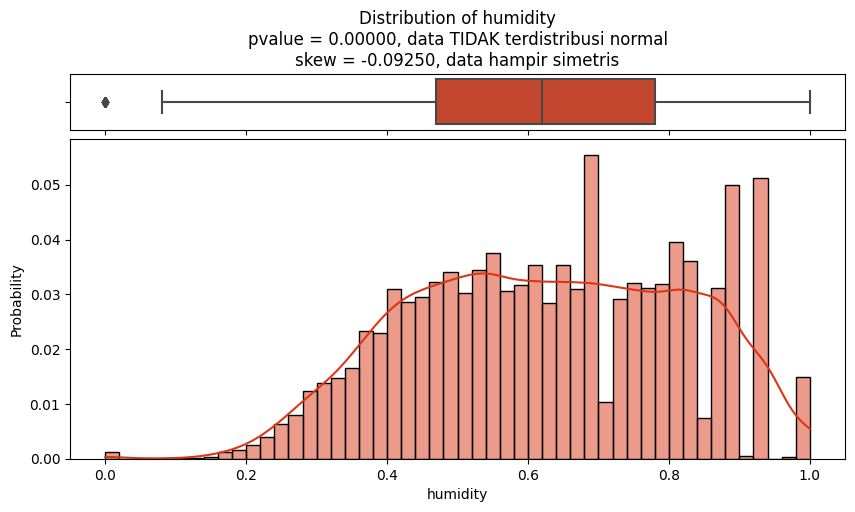

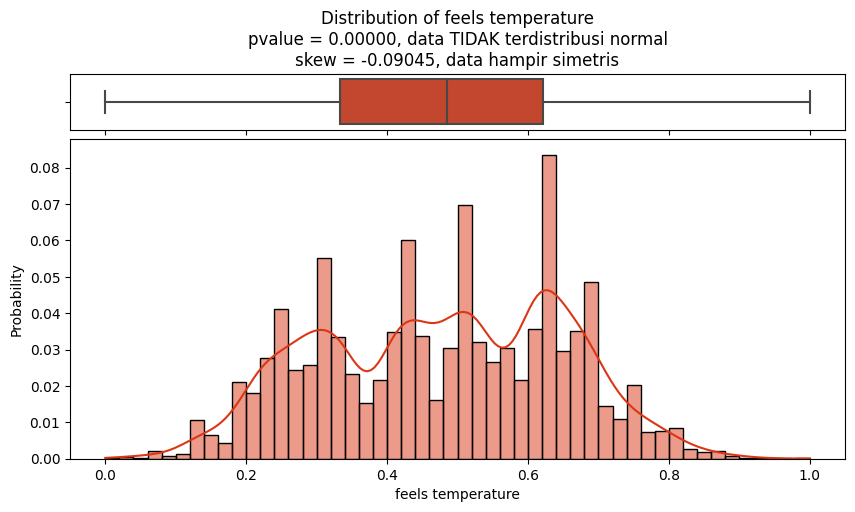

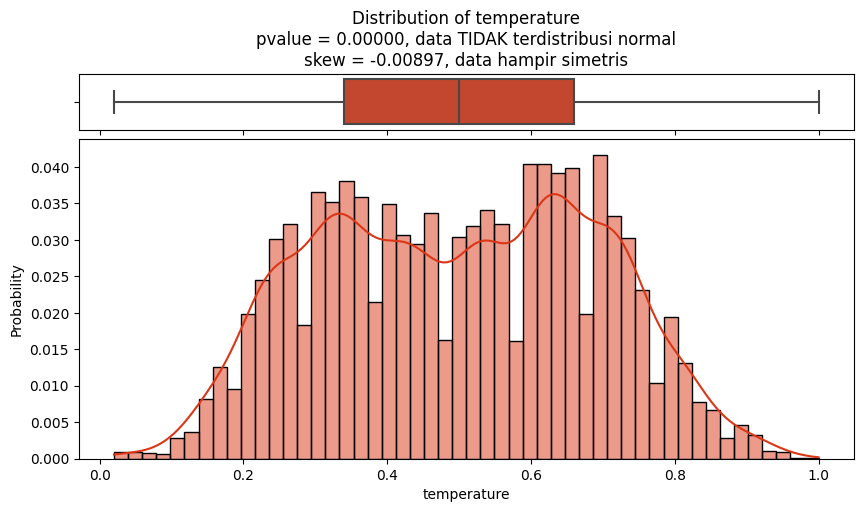

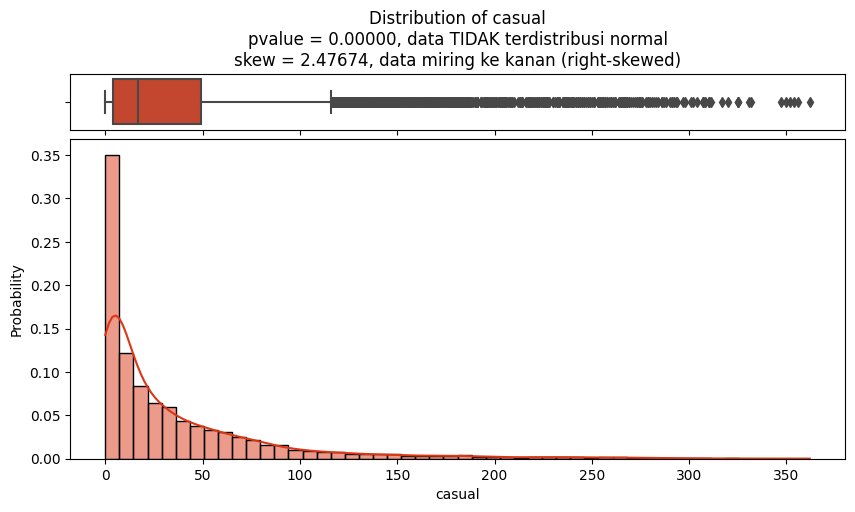

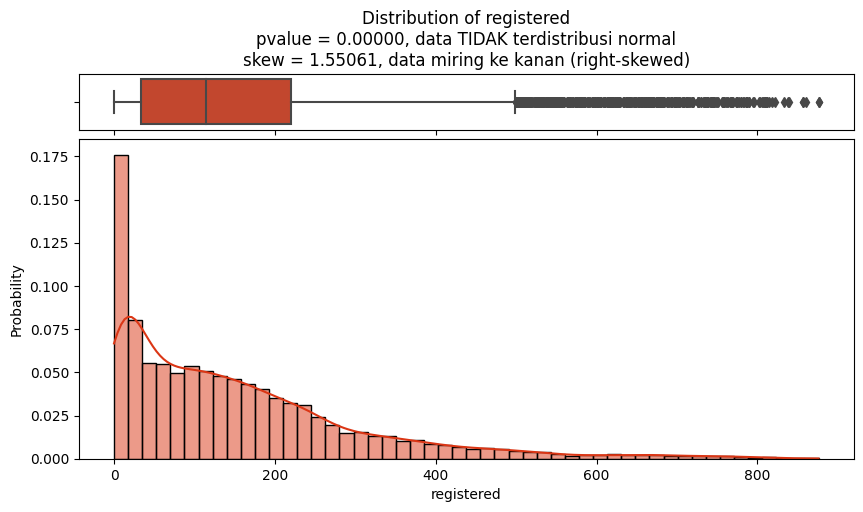

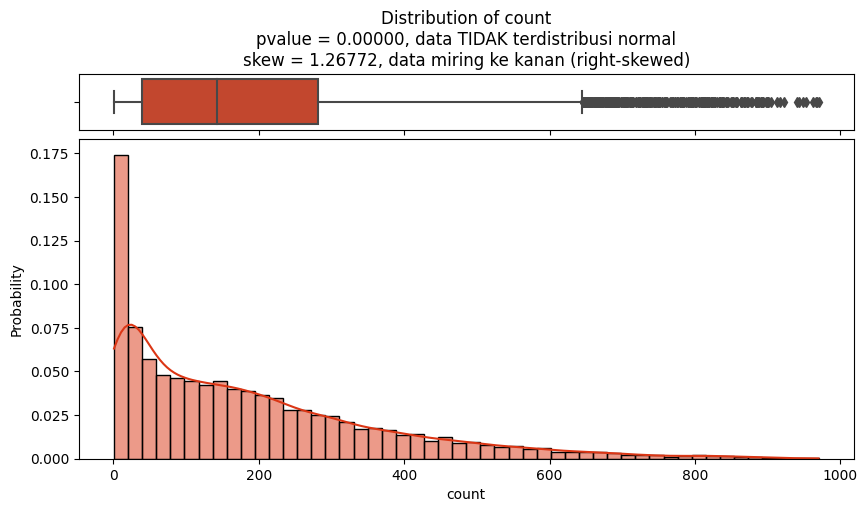

In [14]:
for kolom in numerical_features:

    fig, (ax1, ax2) = plt.subplots(2, sharex = True, figsize = (10,5), gridspec_kw={"height_ratios": (.15, .85), "hspace": 0.05})

    stat, pvalue = normaltest(df_visual[kolom].dropna())

    if pvalue > 0.05 :
        distribusi = f'pvalue = {pvalue:.5f}, data terdistribusi normal'
    else :
        distribusi = f'pvalue = {pvalue:.5f}, data TIDAK terdistribusi normal'

    skew = df_visual[kolom].skew()

    if skew < -0.5:
        skewness = f'skew = {skew:.5f}, data miring ke kiri (left-skewed)'
    elif skew > 0.5:
        skewness = f'skew = {skew:.5f}, data miring ke kanan (right-skewed)'
    else:
        skewness = f'skew = {skew:.5f}, data hampir simetris'

    ax1.set_title(f"Distribution of {kolom}\n{distribusi}\n{skewness}", color = 'black')
    sns.boxplot(x = df_visual[kolom], ax = ax1, color = '#DB3615')
    ax1.set(xlabel = "")

    sns.histplot(data = df_visual[kolom], ax = ax2, stat = "probability", kde=True, bins=50, color = '#DB3615')

    plt.show()

**Penjelasan**
***
- Semua kolom numerikal **tidak** terdistribusi normal.
- Kolom `humidity`, `feels temperature`, dan `temperature` memiliki distribusi hampir simetris mendekati 0, namun ketika di test dengan normal test data tidak terdistribusi normal. Data kemungkinan tergolong distribusinya uniform.
- Kolom `casual`, `registered`, dan `count` memiliki distribusi right-skewed atau miring ke kanan (memiliki nilai skewness positif).

### **Hourly Rental Patterns**

In [15]:
categorical_columns = df_visual.describe(include=object).columns

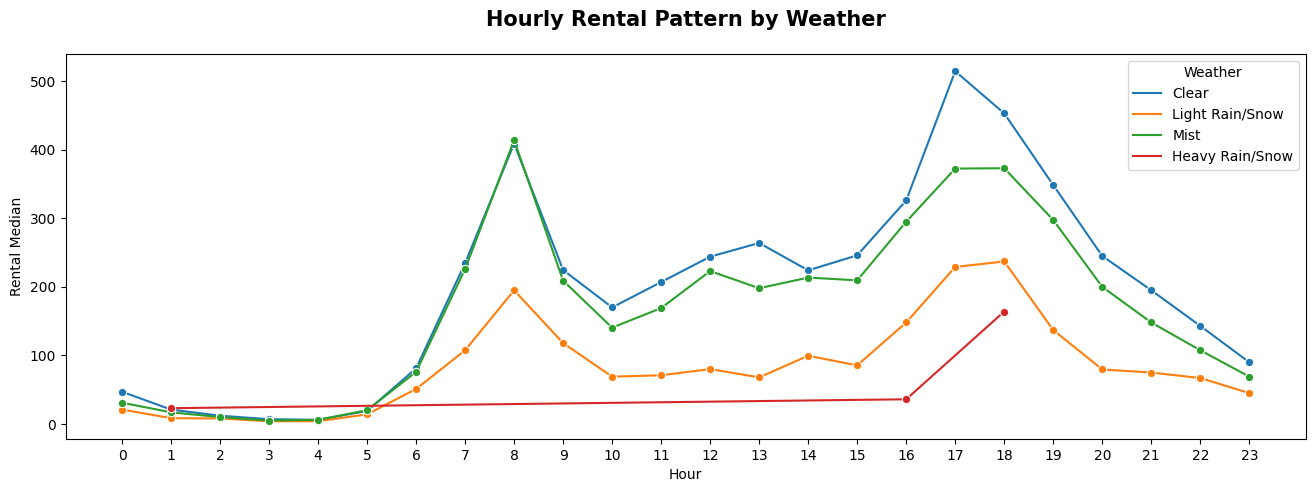

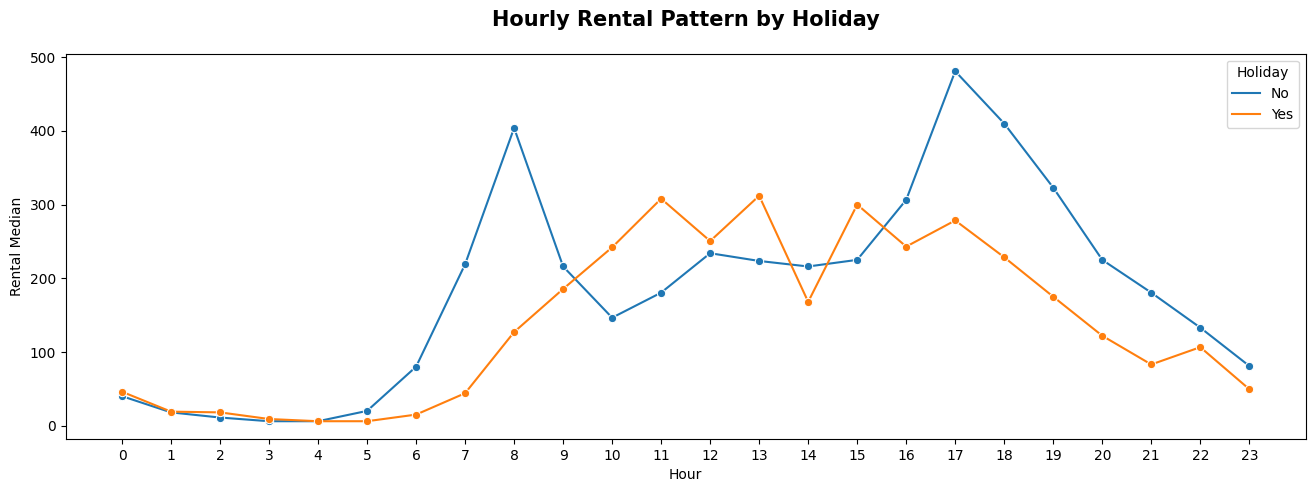

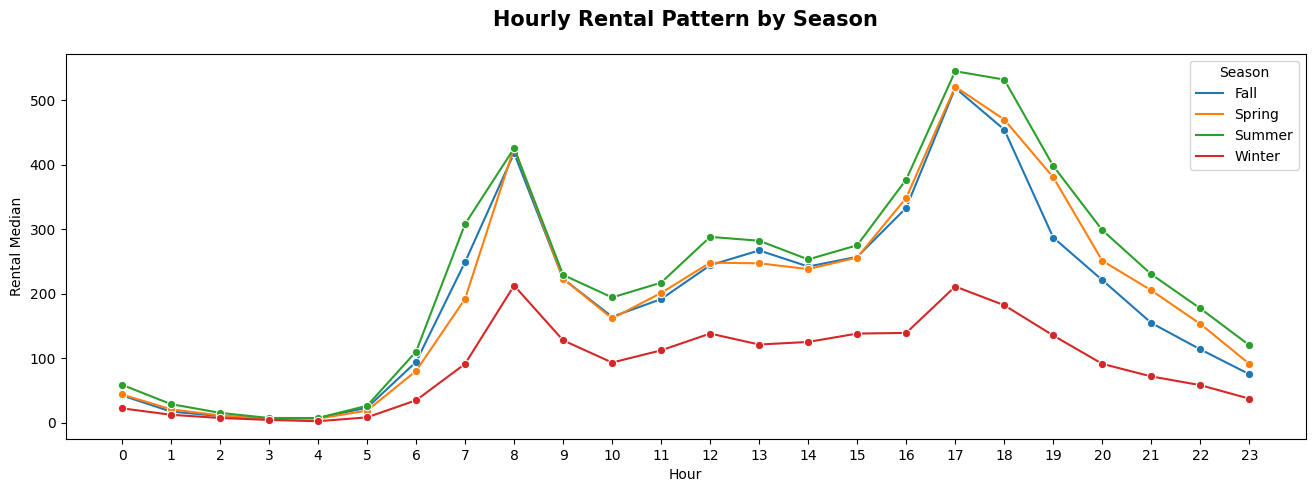

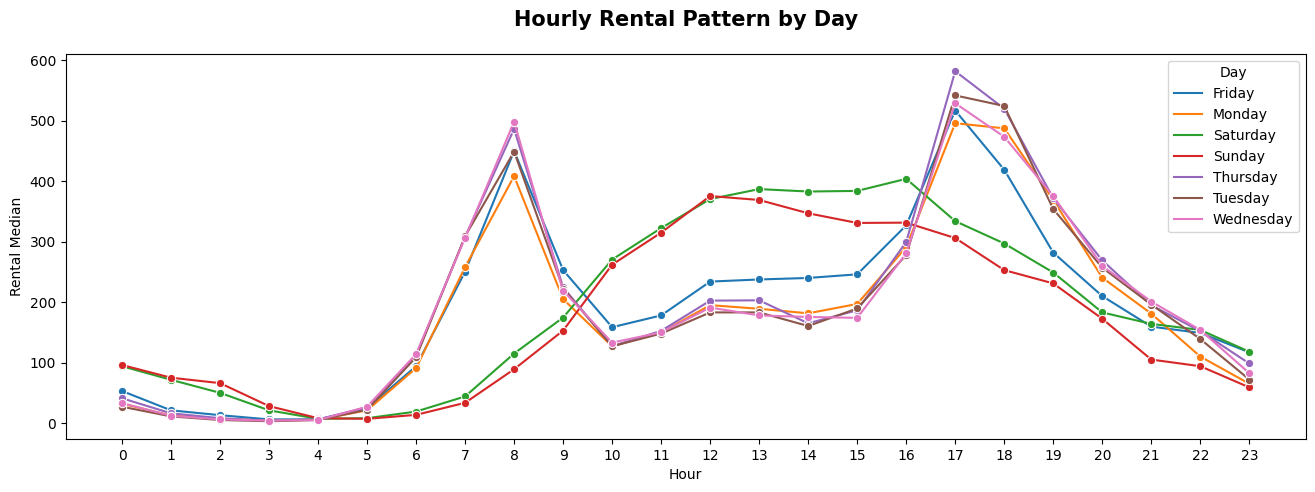

In [16]:
for kolom in categorical_columns:

    plt.figure(figsize=(16,5))
    hour_kolom = df_visual.groupby(['hour', kolom])['count'].median().to_frame().reset_index()
    sns.lineplot(x=hour_kolom['hour'], y=hour_kolom['count'], hue=hour_kolom[kolom], marker='o')
    plt.legend(title=f'{kolom.title()}')
    plt.xlabel('Hour')
    plt.ylabel('Rental Median')
    plt.xticks(np.arange(0,24,1))
    plt.title(f'Hourly Rental Pattern by {kolom.title()}', size=15, pad=20, weight='bold')
    plt.show()

In [17]:
df_visual['weather'].value_counts()

Clear              8071
Mist               3119
Light Rain/Snow     972
Heavy Rain/Snow       3
Name: weather, dtype: int64

**Penejelasan**
***
- Berdasarkan lineplot diatas, perbedaan hari sangat menunjukkan tren yang jelas dalam jumlah persewaan sepeda.
- Hitungan sewa untuk hari kerja menunjukkan pola yang sama dengan penggunaan yang lebih tinggi selama jam pergi dan pulang kerja (jam 8 pagi & jam 5 sore).
- Persewaan sepeda menunjukkan pola yang berbeda pada akhir pekan (Sabtu & Minggu), dengan penggunaan yang lebih tinggi pada sore hari.
- Sabtu memiliki jumlah sewa tertinggi, terutama pada jam-jam terakhir. Karena hari Jumat dan Sabtu dianggap sebagai akhir pekan, orang cenderung keluar lebih larut dan hal ini berdampak pada jumlah persewaan di larut malam.
- Cuaca juga mempengaruhi jumlah persewaan sepeda, orang lebih memilih bersepeda di cuaca yang cerah seperti pada musim panas, semi, dan gugur.
- Cuaca hujan atau salju berat pada musim dingin memperlihatkan adanya pola penyewaan sepeda yang rendah.
- Variasi ini menekankan betapa pentingnya hari dalam seminggu dan cuaca dalam memengaruhi cara orang dalam menyewa sepeda. Memahami pola ini dapat membantu alokasi sumber daya dan pengoptimalan layanan berbagi sepeda sesuai dengan puncak permintaan pada hari dan waktu yang tepat.

### **Weekdays vs Weekend vs Holiday**

In [18]:
med_weekdays = df_visual[(df_visual['day'] != 'Saturday') | (df_visual['day'] != 'Sunday')]['count'].median()
med_weekend = df_visual[(df_visual['day'] == 'Saturday') | (df_visual['day'] == 'Sunday')]['count'].median()
med_holiday = df_visual[df_visual['holiday'] == 'Yes']['count'].median()

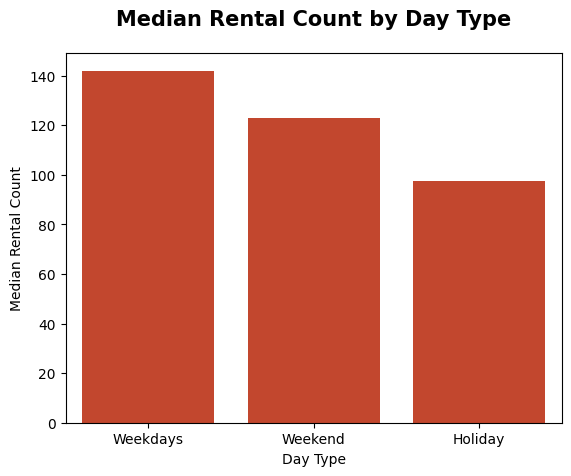

In [19]:
day_type_rent = pd.DataFrame({
    'day_type' : ['Weekdays', 'Weekend', 'Holiday'],
    'med_rent_count' : [med_weekdays, med_weekend, med_holiday]
})

sns.barplot(data=day_type_rent, x='day_type', y='med_rent_count', color='#DB3615')
plt.title('Median Rental Count by Day Type', size=15, pad=20, weight='bold')
plt.xlabel('Day Type')
plt.ylabel('Median Rental Count')
plt.show()

**Penjelasan**
***
- Berdasarkan barchart diatas, dibandingkan dengan hari libur orang biasanya menyewa sepeda lebih banyak pada akhir pekan (Sabtu dan Minggu).
- Temuan ini menunjukkan bahwa orang lebih sering menggunakan layanan berbagi sepeda di akhir pekan ketika mereka memiliki lebih banyak waktu luang untuk kegiatan santai.
- Permintaan untuk menyewa sepeda tampaknya relatif lebih rendah pada hari libur, kemungkinan karena aktivitas terkait liburan lainnya.

### **Humidity & Temperature Rental Patterns**

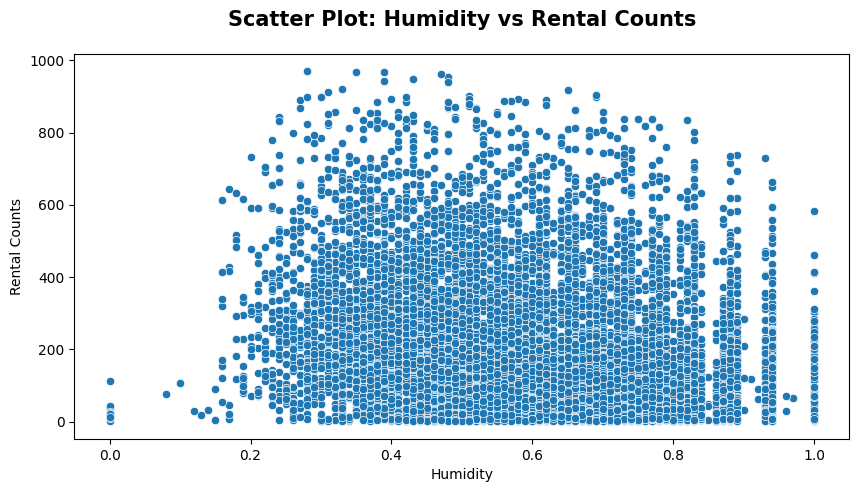

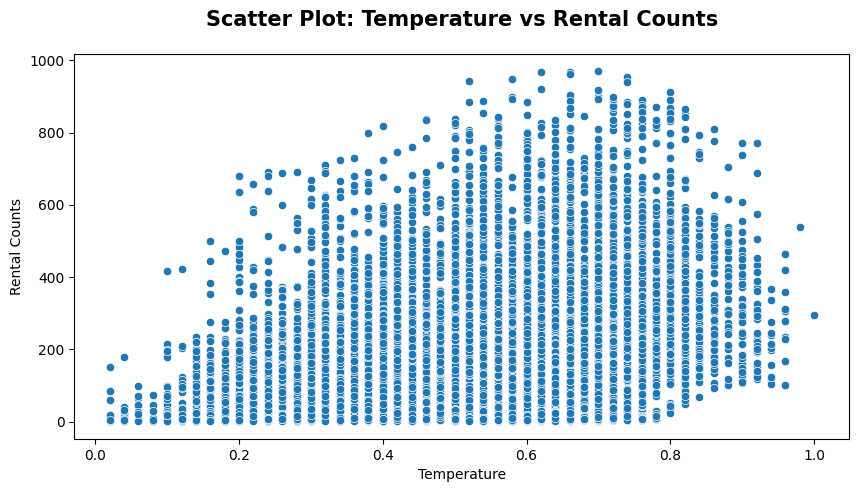

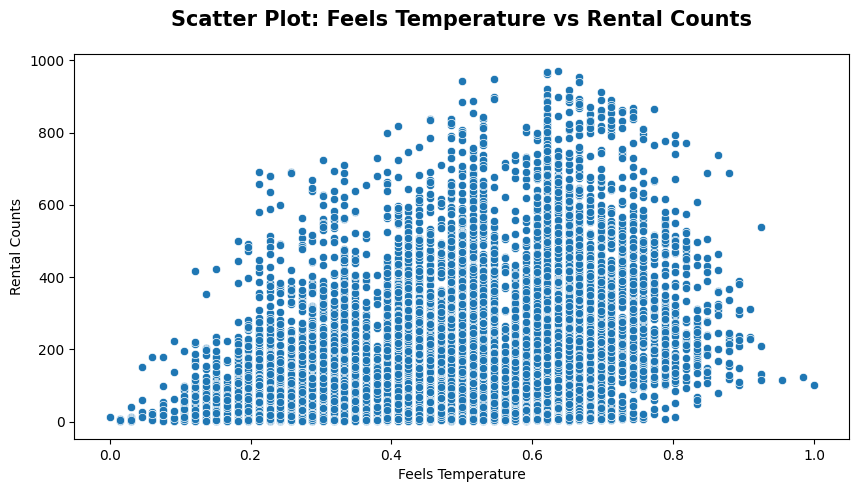

In [20]:
for kolom in ['humidity','temperature', 'feels temperature']:

    plt.figure(figsize=(10, 5))
    sns.scatterplot(x=kolom, y='count', data=df_visual)
    plt.xlabel(f'{kolom.title()}', )
    plt.ylabel('Rental Counts')
    plt.title(f'Scatter Plot: {kolom.title()} vs Rental Counts', size=15, pad=20, weight='bold')
    plt.show()

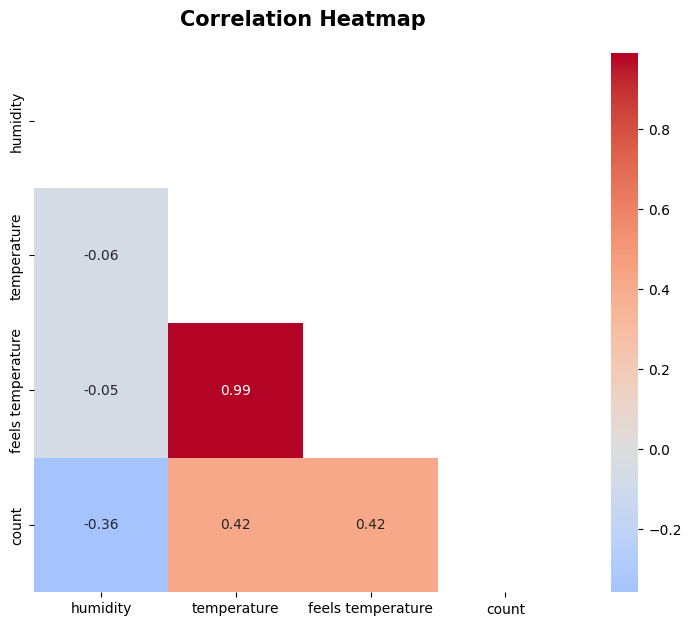

In [21]:
hum_temp = df_visual[['humidity', 'temperature', 'feels temperature', 'count']]

plt.figure(figsize=(10,7))
matrix = np.triu(hum_temp.corr(method='spearman'))
sns.heatmap(data=hum_temp.corr(method='spearman'), annot=True, fmt='.2f', cmap='coolwarm', center=0, mask = matrix, square='True')
plt.title('Correlation Heatmap', size=15, pad=20, weight='bold')
plt.show()

**Penjelasan**
***
- Kolom `temperature` dan `feels temperature` menunjukkan korelasi yang kuat dalam *correlation heatmap*, yang menunjukkan bahwa kedua fitur ini mengandung banyak data redundan. Karena salah satu kolom ini pada dasarnya memberikan informasi yang sama dengan kolom lainnya, maka dapat dikatakan redundan atau tidak diperlukan untuk analisis lebih lanjut.
- Pada *correlation heatmap* menunjukkan bahwa korelasi antara kelembaban, suhu, suhu rasa, dan jumlah sewa adalah sedang hingga rendah (*moderate to low*). Karena tidak ada pola yang terlihat dalam *scatter plot*, dapat disimpulkan bahwa perubahan kelembaban, suhu, dan suhu rasa memiliki pengaruh yang kecil terhadap permintaan persewaan sepeda.

### **Casual vs Registered Users**

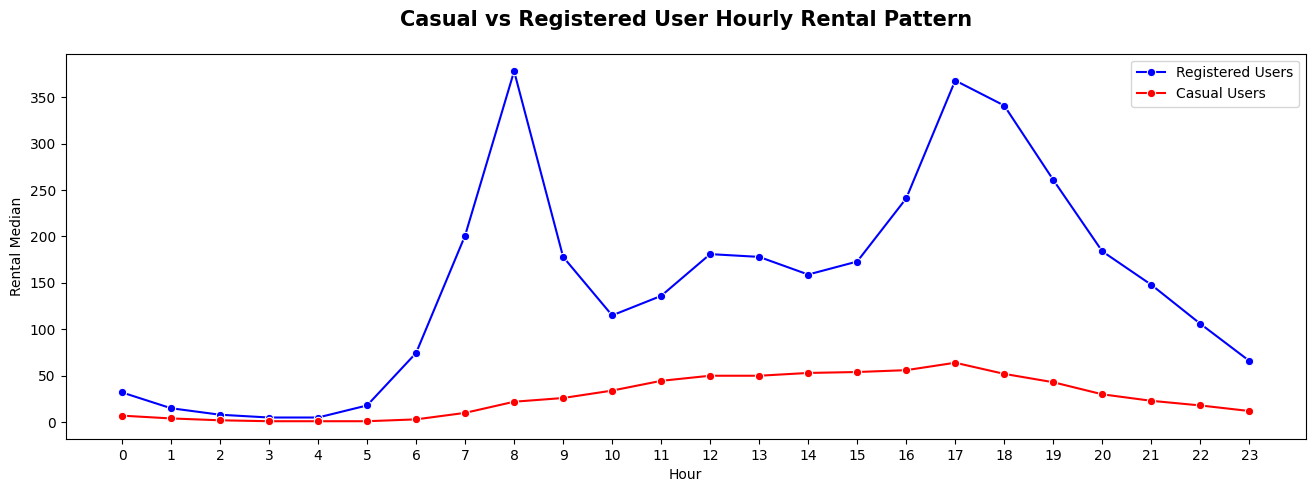

In [22]:
plt.figure(figsize=(16,5))
hourly_counts_casual = df_visual.groupby('hour')['casual'].median()
hourly_counts_registered = df_visual.groupby('hour')['registered'].median()
sns.lineplot(x=hourly_counts_registered.index, y=hourly_counts_registered.values, label='Registered Users', color='blue', marker='o')
sns.lineplot(x=hourly_counts_casual.index, y=hourly_counts_casual.values, label='Casual Users', color='red', marker='o')
plt.legend()
plt.xlabel('Hour')
plt.ylabel('Rental Median')
plt.xticks(np.arange(0,24,1))
plt.title('Casual vs Registered User Hourly Rental Pattern', size=15, pad=20, weight='bold')
plt.show()

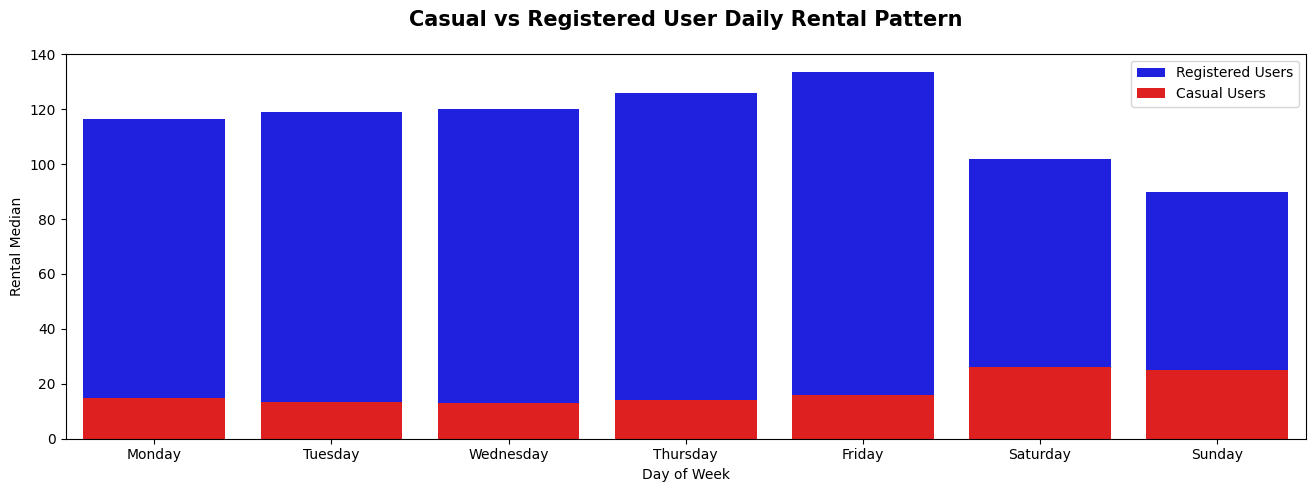

In [23]:
plt.figure(figsize=(16,5))
day_of_week_counts = df_visual.groupby('day')[['casual', 'registered']].median()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.barplot(x=day_of_week_counts.index, y=day_of_week_counts['registered'], label='Registered Users', color='blue', order=day_order)
sns.barplot(x=day_of_week_counts.index, y=day_of_week_counts['casual'], label='Casual Users', color='red', order=day_order)
plt.legend()
plt.xlabel('Day of Week')
plt.ylabel('Rental Median')
plt.title('Casual vs Registered User Daily Rental Pattern', size=15, pad=20, weight='bold')
plt.show()

**Penjelasan**
***
- Berdasarkan lineplot, pengguna *registered* menampilkan pola yang mirip pada jam kerja. Namun, tren untuk pengguna *casual* berbeda dengan jumlah sewa sore lebih tinggi. 
- Begitu juga pada barchart, pengguna *registered* cenderung lebih sering menyewa sepeda selama hari kerja dan lebih jarang pada akhir pekan. Sebaliknya, pengguna *casual* menyewa sepeda lebih sering pada akhir pekan daripada hari biasa.
- Temuan ini menunjukkan bahwa sementara pengguna *casual* cenderung lebih sering menyewa sepeda selama waktu santai, sedangkan pengguna *registered* menggunakan sepeda untuk kebutuhan kerja sehari-hari.

***
# **Data Preprocessing**
***

### **Add Columns & Change Type**

Kita akan kembali memakai data awal df.

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12165 entries, 0 to 12164
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      12165 non-null  object 
 1   hum         12165 non-null  float64
 2   weathersit  12165 non-null  int64  
 3   holiday     12165 non-null  int64  
 4   season      12165 non-null  int64  
 5   atemp       12165 non-null  float64
 6   temp        12165 non-null  float64
 7   hr          12165 non-null  int64  
 8   casual      12165 non-null  int64  
 9   registered  12165 non-null  int64  
 10  cnt         12165 non-null  int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 1.0+ MB


Kita akan melakukan mengubah data type `dteday` menjadi datetime dan ekstraksi fitur tanggal, bulan, dan tahun.

In [25]:
df['dteday'] = pd.to_datetime(df['dteday'])
df['day'] = df['dteday'].dt.day_of_week
df['month'] = df['dteday'].dt.month
df['year'] = df['dteday'].dt.year

Setelah itu, kita akan ubah nama kolom agar mudah dimengerti.

In [26]:
df.rename(columns={'dteday':'date','weathersit':'weather', 'holiday':'holiday', 'season':'season', 'hum':'humidity', 'temp':'temperature', 'atemp':'feels temperature', 'hr':'hour', 'cnt':'count'}, inplace=True)

In [27]:
df.head()

,date,humidity,weather,holiday,season,feels temperature,temperature,hour,casual,registered,count,day,month,year
0,2011-12-09,0.62,1,0,4,0.3485,0.36,16,24,226,250,4,12,2011
1,2012-06-17,0.64,1,0,2,0.5152,0.54,4,2,16,18,6,6,2012
2,2011-06-15,0.53,1,0,2,0.6212,0.62,23,17,90,107,2,6,2011
3,2012-03-31,0.87,2,0,2,0.3485,0.36,8,19,126,145,5,3,2012
4,2012-07-31,0.55,1,0,3,0.6970,0.76,18,99,758,857,1,7,2012


Menambah kolom `working_day` dimana hari itu bukan akhir pekan atau hari libur.

In [28]:
df['working_day'] = np.where(((df['holiday'] == 0) & (df['day'] != 5) & (df['day'] != 6)), 1, 0)

Mengubah tipe data yang belum sesuai.

In [29]:
df = df.astype({'weather':'category', 'holiday':'category', 'season':'category', 'day':'category', 'month':'category', 'year':'category', 'working_day':'category'})

### **Drop Unnecessary Column**

In [30]:
df.head()

,date,humidity,weather,holiday,season,feels temperature,temperature,hour,casual,registered,count,day,month,year,working_day
0,2011-12-09,0.62,1,0,4,0.3485,0.36,16,24,226,250,4,12,2011,1
1,2012-06-17,0.64,1,0,2,0.5152,0.54,4,2,16,18,6,6,2012,0
2,2011-06-15,0.53,1,0,2,0.6212,0.62,23,17,90,107,2,6,2011,1
3,2012-03-31,0.87,2,0,2,0.3485,0.36,8,19,126,145,5,3,2012,0
4,2012-07-31,0.55,1,0,3,0.6970,0.76,18,99,758,857,1,7,2012,1


- Kolom `feels temperature` memberikan informasi yang sama dengan kolom `temperature`, maka di drop saja.
- Kolom `date` memberikan informasi yang sama dengan kolom `day`, `month`, `year`, maka di drop saja.
- Kolom `casual` dan `registered` adalah bagian dari informasi kolom `cnt`, maka di drop saja.

In [31]:
df.drop(columns=['date', 'feels temperature', 'casual', 'registered'], inplace=True)

In [32]:
df.head()

,humidity,weather,holiday,season,temperature,hour,count,day,month,year,working_day
0,0.62,1,0,4,0.36,16,250,4,12,2011,1
1,0.64,1,0,2,0.54,4,18,6,6,2012,0
2,0.53,1,0,2,0.62,23,107,2,6,2011,1
3,0.87,2,0,2,0.36,8,145,5,3,2012,0
4,0.55,1,0,3,0.76,18,857,1,7,2012,1


### **Handling Outliers**

In [33]:
num_col = df.describe().columns
num_col

Index(['humidity', 'temperature', 'hour', 'count'], dtype='object')

In [34]:
list_lower = []
list_upper = []
number_lower = []
number_inside = []
number_upper = []
percentage_outlier = []

for feature in num_col: 
    IQR = df[feature].quantile(0.75) - df[feature].quantile(0.25)
    lower_fence = df[feature].quantile(0.25) - 1.5*IQR
    upper_fence = df[feature].quantile(0.75) + 1.5*IQR
    list_lower.append(lower_fence)
    list_upper.append(upper_fence)
    number_lower.append(len(df[df[feature]<lower_fence]))
    number_inside.append(len(df[(df[feature]>=lower_fence) & (df[feature]<=upper_fence)]))
    number_upper.append(len(df[df[feature]>upper_fence]))
    percentage_outlier.append(round((len(df[df[feature]<lower_fence]) + len(df[df[feature]>upper_fence])) / len(df)  *100, 2))

outliers = pd.DataFrame({
    'Kolom' : num_col,
    'Lower' : list_lower,
    'Upper' : list_upper,
    '# Lower' : number_lower,
    '# Inside' : number_inside,
    '# Upper' : number_upper,
    '% Outlier' : percentage_outlier
})

outliers

,Kolom,Lower,Upper,# Lower,# Inside,# Upper,% Outlier
0,humidity,0.005,1.245,14,12151,0,0.12
1,temperature,-0.140,1.140,0,12165,0,0.00
2,hour,-12.000,36.000,0,12165,0,0.00
3,count,-323.000,645.000,0,11827,338,2.78


**Humidity Column**

In [35]:
df[df['humidity'] < 0.005]

,humidity,weather,holiday,season,temperature,hour,count,day,month,year,working_day
345,0.0,3,0,1,0.38,7,37,3,3,2011,1
871,0.0,3,0,1,0.44,15,14,3,3,2011,1
1645,0.0,3,0,1,0.34,0,3,3,3,2011,1
3239,0.0,2,0,1,0.44,17,111,3,3,2011,1
3717,0.0,2,0,1,0.34,22,34,3,3,2011,1
4924,0.0,3,0,1,0.36,6,12,3,3,2011,1
7285,0.0,3,0,1,0.34,1,2,3,3,2011,1
7760,0.0,3,0,1,0.42,12,34,3,3,2011,1
8412,0.0,3,0,1,0.38,8,44,3,3,2011,1
8960,0.0,3,0,1,0.34,23,27,3,3,2011,1


Terlihat pada tabel bahwa ada 0.12% (sedikit) data outliers pada kolom humidity adalah humidity = 0 atau pada saat musim dingin (salju).

Menurut ahli, humidity tidak mungkin tepat 0% karena uap air selalu ada di udara. Bahkan di kota Safi-Abad Dezful di Iran barat tercatat humidity terendah pada 20 Juni 2017, ketika suhu mencapai 115,7 derajat dan titik embun -27,8 derajat, menghasilkan kelembaban relatif 0,36 persen. [(Sumber)](https://wgntv.com/weather/weather-blog/is-a-humidity-of-zero-percent-possible/#:~:text=Given%20the%20Earth's%20present%20climate,humidity%20of%20exactly%20zero%20percent.)

Karena itu outlier pada humidity dapat dihilangkan saja karena tidak masuk akal (kemungkinan salah input) dan jumlahnya juga sedikit.

In [36]:
df = df[df['humidity'] > 0.005]

**Count Column**

In [37]:
df[df['count'] > 645]

,humidity,weather,holiday,season,temperature,hour,count,day,month,year,working_day
4,0.55,1,0,3,0.76,18,857,1,7,2012,1
20,0.94,1,0,4,0.38,8,662,1,12,2012,1
22,0.73,1,0,4,0.56,8,838,2,9,2012,1
34,0.33,1,0,4,0.60,16,691,6,9,2012,0
43,0.55,1,0,3,0.80,12,694,5,9,2012,0
...,...,...,...,...,...,...,...,...,...,...,...
12006,0.73,2,0,2,0.62,8,713,2,6,2012,1
12017,0.58,2,0,4,0.40,17,723,2,10,2012,1
12023,0.57,1,0,1,0.64,18,801,0,3,2012,1
12027,0.39,1,0,4,0.52,17,943,1,10,2012,1


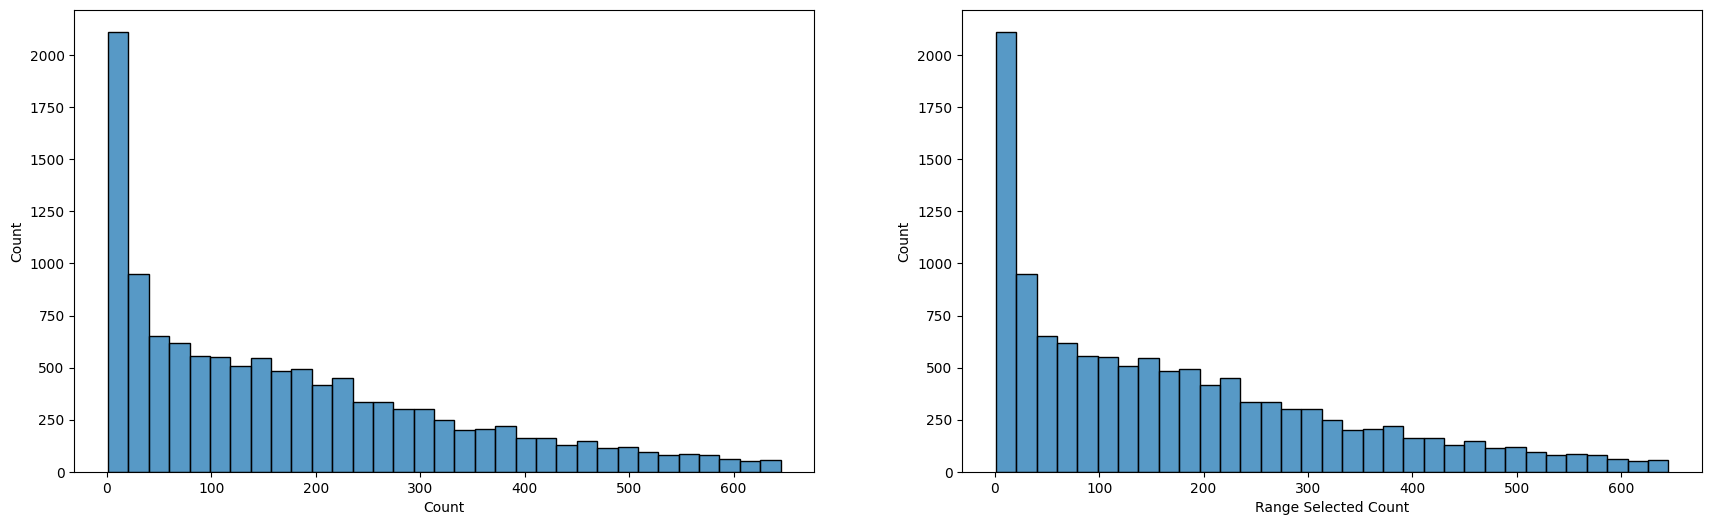

In [38]:
df = df[(df['count'] <= 645.0) & (df['count'] >= -323.0)]
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.histplot(df['count'], ax=axes[0])
sns.histplot(df['count'], ax=axes[1])
axes[0].set_xlabel('Count')
axes[1].set_xlabel('Range Selected Count');

Kita bisa lihat bahwa data outlier pada kolom `count` tidak terlalu berpengaruh terhadap keseluruhan data, jumlahnya juga 2.78%. Jika semua outlier dihilangkan kita hanya kehilangan 3% dari data aslinya. Maka outlier pada kolom `count` dapat dihapus saja.

### **Clean Dataset**

In [39]:
df_model = df

In [40]:
df_model.head()

,humidity,weather,holiday,season,temperature,hour,count,day,month,year,working_day
0,0.62,1,0,4,0.36,16,250,4,12,2011,1
1,0.64,1,0,2,0.54,4,18,6,6,2012,0
2,0.53,1,0,2,0.62,23,107,2,6,2011,1
3,0.87,2,0,2,0.36,8,145,5,3,2012,0
5,0.72,1,0,4,0.46,0,45,0,10,2012,1


In [41]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11813 entries, 0 to 12164
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   humidity     11813 non-null  float64 
 1   weather      11813 non-null  category
 2   holiday      11813 non-null  category
 3   season       11813 non-null  category
 4   temperature  11813 non-null  float64 
 5   hour         11813 non-null  int64   
 6   count        11813 non-null  int64   
 7   day          11813 non-null  category
 8   month        11813 non-null  category
 9   year         11813 non-null  category
 10  working_day  11813 non-null  category
dtypes: category(7), float64(2), int64(2)
memory usage: 543.7 KB


Pada akhirnya, tersisa **11.813 baris data** yang akan digunakan untuk pemodelan.

### **Encoding**

In [42]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from category_encoders import BinaryEncoder

In [43]:
categorical_features = df_model.describe(include='category').columns

In [44]:
listItem = []
for col in categorical_features :
    listItem.append( [col, df[col].nunique(), df.sort_values(col)[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Values'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Values
0,weather,4,"[1, 2, 3, 4] Categories (4, int64): [1, 2, 3, 4]"
1,holiday,2,"[0, 1] Categories (2, int64): [0, 1]"
2,season,4,"[1, 2, 3, 4] Categories (4, int64): [1, 2, 3, 4]"
3,day,7,"[0, 1, 2, 3, 4, 5, 6] Categories (7, int64): [..."
4,month,12,"[1, 2, 3, 4, 5, ..., 8, 9, 10, 11, 12] Length:..."
5,year,2,"[2011, 2012] Categories (2, int64): [2011, 2012]"
6,working_day,2,"[0, 1] Categories (2, int64): [0, 1]"


- Kita akan memakai **One Hot Encoding** untuk kolom `weather`, `holiday`, `season`, `year`, dan `working_day` karena jumlah unique values-nya tidak banyak dan bersifat nominal.
- Kita akan memakai **Binary Encoding** untuk kolom `day` dan `month` karena jumlah unique values-nya cukup banyak dan bersifat nominal.

In [45]:
transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), ['weather', 'holiday', 'season', 'year', 'working_day']),
    ('binary', BinaryEncoder(), ['day', 'month'])
], remainder='passthrough')

### **Scaling**

Kita akan menggunakan Standard Scaler karena data kita sudah tidak memiliki outlier. Namun kita dapat mengatur ulang scaler nantinya untuk mendapatkan scaler terbaik.

In [46]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler

In [47]:
# scaling features 
standard = StandardScaler()

# for tuning
robust = RobustScaler()
minmax = MinMaxScaler()

***
# **Modeling**
***

### **Define Features (X) and Target (y)**

In [48]:
X = df_model.drop(columns='count')
y = df_model['count']

In [49]:
X.head()

,humidity,weather,holiday,season,temperature,hour,day,month,year,working_day
0,0.62,1,0,4,0.36,16,4,12,2011,1
1,0.64,1,0,2,0.54,4,6,6,2012,0
2,0.53,1,0,2,0.62,23,2,6,2011,1
3,0.87,2,0,2,0.36,8,5,3,2012,0
5,0.72,1,0,4,0.46,0,0,10,2012,1


In [50]:
y.head()

0    250
1     18
2    107
3    145
5     45
Name: count, dtype: int64

### **Data Splitting**

In [51]:
from sklearn.model_selection import train_test_split

Kami akan menggunakan 70% dari dataset masuk ke set pelatihan (*train set*) dan 30% dari dataset masuk ke set pengujian (*test set*).

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### **Benchmark Model**

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

Kita akan mencoba 5 model regresi untuk dilihat performa terbaiknya, yaitu:
- Linear Regression
- KNN Regressor
- Decision Tree Regressor
- Random Forest Regressor
- XGBoost Regressor

In [54]:
from sklearn.model_selection import cross_val_score, KFold

# mendefinisikan 5 algoritma yang akan dipakai
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=0)
rf = RandomForestRegressor(random_state=0)
xgb = XGBRegressor(random_state=0)

# permodelan dilakukan dalam skala logaritmik, namun kemudian di-inverse kembali untuk interpretasi
# fungsi logaritmik digunakan untuk melinierkan target, memungkinkan prediksi yang lebih baik
log_lr = TransformedTargetRegressor(lr, func=np.log, inverse_func=np.exp)
log_knn = TransformedTargetRegressor(knn, func=np.log, inverse_func=np.exp)
log_dt = TransformedTargetRegressor(dt, func=np.log, inverse_func=np.exp)
log_rf = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)

# memasukkan kandidat algoritma dalam list models
models = [log_lr, log_knn, log_dt, log_rf, log_xgb]

score_rmse = []
nilai_mean_rmse = []
nilai_std_rmse = []

score_mae = []
nilai_mean_mae = []
nilai_std_mae = []

score_mape = []
nilai_mean_mape = []
nilai_std_mape = []

# mencari algoritma terbaik berdasarkan tiap metrics
for i in models:
    
    # 5-fold cross validation adalah split yang biasa digunakan. Ini berarti 20% dari data digunakan untuk pengujian, ini biasanya cukup akurat.
    # namun, jika ukuran kumpulan data yang dimiliki lebih dari 100.000, dapat menggunakan 10-fold cross validation yang akan menghasilkan lipatan 10.000 instans.
    # karena dalam data model ini hanya memiliki 11.813 data, maka akan menggunakan 5-fold cross validation.
    crossval = KFold(n_splits=5, shuffle=True, random_state=0)

    estimator = Pipeline([
        ('preprocessing', transformer),
        ('scaler', standard),
        ('model', i)
    ])

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_root_mean_squared_error',
        error_score='raise'
        )

    score_rmse.append(model_cv_rmse)
    nilai_mean_rmse.append(model_cv_rmse.mean())
    nilai_std_rmse.append(model_cv_rmse.std())

    # MAE
    model_cv_mae = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_error', 
        error_score='raise'
        )

    score_mae.append(model_cv_mae)
    nilai_mean_mae.append(model_cv_mae.mean())
    nilai_std_mae.append(model_cv_mae.std())

    # MAPE
    model_cv_mape = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_percentage_error', 
        error_score='raise'
        )

    score_mape.append(model_cv_mape)
    nilai_mean_mape.append(model_cv_mape.mean())
    nilai_std_mape.append(model_cv_mape.std())

In [55]:
# Evaluasi hasil dari 5 kandidat algoritma yang digunakan
pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'XGBoost Regressor'],
    'Mean_RMSE': nilai_mean_rmse,
    'Std_RMSE': nilai_std_rmse,
    'Mean_MAE': nilai_mean_mae,
    'Std_MAE': nilai_std_mae,
    'Mean_MAPE': nilai_mean_mape,
    'Std_MAPE': nilai_std_mape
}).sort_values('Mean_RMSE', ascending=False)

,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE
4,XGBoost Regressor,-43.005291,2.021876,-26.263879,0.710666,-0.269901,0.011644
3,RandomForest Regressor,-48.399832,1.645246,-29.368644,0.858320,-0.302375,0.015487
2,DecisionTree Regressor,-67.153230,1.777239,-40.156824,0.646822,-0.428083,0.024686
1,KNN Regressor,-117.309725,3.375543,-78.671827,2.159983,-1.537046,0.109456
0,Linear Regression,-141.063731,2.714422,-95.584081,2.622954,-1.345687,0.035685


**Interpretasi Hasil Benchmark Model**
***
- Berdasarkan nilai RMSE, MAE dan MAPE, **XGBoost** adalah model terbaik karena menghasilkan nilai residual atau error yang paling rendah.
- RMSE dan MAE mengembalikan error pada skala yang sama dengan jumlah sepeda yang diprediksi, tetapi RMSE lebih tinggi (1,6x MAE) karena ada outlier dalam kumpulan data yang meningkatkan kesalahan. Ini dikarenakan RMSE lebih sensitif terhadap outlier.
- Pada semua model terdapat perbedaan yang signifikan antara nilai RMSE dan MAE yang berarti terdapat nilai error yang cukup besar pada semua model.
- Pada train set menggunakan model XGBoost memiliki nilai MAPE 26.9%, atau rata-rata prediksi berjarak 26,9% dari target, nilai ini terbilang nilai yang wajar.
- Selanjutnya, akan dilakukan prediksi pada test set dengan benchmark model terbaik, yaitu XGBoost.

**XGBoost Regressor**
***
- XGBoost, yang merupakan singkatan dari Extreme Gradient Boosting, adalah library machine learning berbasis decision tree yang ditingkatkan dari model gradient boosting.
- XGBoost menawarkan regularisasi, yang memungkinkan untuk mengontrol overfitting dengan memperkenalkan penalti L1/L2 pada bobot dan bias setiap pohon. Fitur ini tidak tersedia di banyak implementasi gradient boosting lainnya.
- Pada algoritma ini, decision tree dibuat dalam bentuk berurutan (sequential). Bobot memainkan peran penting dalam XGBoost. Bobot diberikan ke semua variabel independen yang kemudian dimasukkan ke dalam decision tree yang memprediksi hasil. Bobot variabel yang diprediksi salah oleh pohon dinaikkan dan variabel ini kemudian dimasukkan ke pohon keputusan kedua. Pengklasifikasi/prediktor individu ini kemudian disatukan untuk memberikan model yang kuat dan lebih tepat. Ini dapat bekerja pada masalah regresi maupun klasifikasi.

### **Predict to Test Set with Benchmark Model**

Benchmark Model : XGBoost

In [56]:
# Model XGBoost
models = {'XGB': XGBRegressor(random_state=0)}

score_rmse = []
score_mae = []
score_mape = []

# karena permodelan dilakukan dalam skala logaritmik, maka saat predict ke test set juga memakai skala logaritimik
# hal ini dilakukan agar apple to apple (perbandingan yang dianggap valid karena menyangkut dua hal yang pada dasarnya sama)
model = Pipeline([
    ('preprocessing', transformer),
    ('scaler', standard),
    ('model', log_xgb)
])

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
score_mae.append(mean_absolute_error(y_test, y_pred))
score_mape.append(mean_absolute_percentage_error(y_test, y_pred))

score_before_tuning = pd.DataFrame({'RMSE': score_rmse, 'MAE': score_mae, 'MAPE': score_mape}, index=models.keys())
score_before_tuning

,RMSE,MAE,MAPE
XGB,42.037373,25.642264,0.255405


Performa kumulatif XGBoost bekerja sedikit lebih baik saat dilakukan prediksi ke test set dari segi nilai RMSE, MAE, maupun MAPE. Untuk mengoptimalkan kinerja model XGBoost, akan dilakukan hyperparameter tuning.

### **Hyperparameter Tuning with Best Model**

In [57]:
from sklearn.model_selection import RandomizedSearchCV

**Random Search**

In [58]:
# kedalaman pohon
max_depth = list(np.arange(5, 15)) #semakin tinggi nilainya maka semakin kompleks dan meningkatkan kemungkinan overfitting

# learning rate
learning_rate = list(np.arange(1, 51)/100) #semakin rendah nilainya maka dapat meningkatkan peluang mencapai nilai optimum yang lebih baik namun dengan waktu komputasi yang lebih lambat

# jumlah pohon
n_estimators = list(np.arange(100, 251)) #ekuivalen dengan jumlah round dari boosting


# hyperparam space XGboost
hyperparam_space_xgb = {
    'model__regressor__max_depth': max_depth, 
    'model__regressor__learning_rate': learning_rate,
    'model__regressor__n_estimators': n_estimators,
    'scaler': [minmax, standard, robust]
}

In [59]:
# karena permodelan dilakukan dalam skala logaritmik, maka saat hyperparameter tuning juga memakai skala logaritimik
# hal ini dilakukan agar apple to apple (perbandingan yang dianggap valid karena menyangkut dua hal yang pada dasarnya sama)
pipe_model = Pipeline([
    ('preprocess', transformer),
    ('scaler', standard),
    ('model', TransformedTargetRegressor(regressor=xgb, func=np.log, inverse_func=np.exp))
])

crossval = KFold(n_splits=5, shuffle=True, random_state=0)

random_search_xgb = RandomizedSearchCV(
    estimator = pipe_model,
    param_distributions = hyperparam_space_xgb,
    cv = crossval,
    scoring = 'neg_root_mean_squared_error',
    n_iter = 50,
    n_jobs = -1,
    random_state=0
)

In [60]:
random_search_xgb.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
                   estimator=Pipeline(steps=[('preprocess',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('onehot',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['weather',
                                                                                'holiday',
                                                                                'season',
                                                                                'year',
                                                                                'working_day']),
                                                                              ('binary',
                                                                               BinaryEncoder(),
                                                                               ['day',
                                                                                'month'])])),
                                             ('scaler', StandardScaler()),
                                             ('model',
                                              TransformedT...
                                                                            0.27,
                                                                            0.28,
                                                                            0.29,
                                                                            0.3, ...],
                                        'model__regressor__max_depth': [5, 6, 7,
                                                                        8, 9,
                                                                        10, 11,
                                                                        12, 13,
                                                                        14],
                                        'model__regressor__n_estimators': [100,
                                                                           101,
                                                                           102,
                                                                           103,
                                                                           104,
                                                                           105,
                                                                           106,
                                                                           107,
                                                                           108,
                                                                           109,
                                                                           110,
                                                                           111,
                                                                           112,
                                                                           113,
                                                                           114,
                                                                           115,
                                                                           116,
                                                                           117,
                                                                           118,
                                                                           119,
                                                                           120,
                                                                           121,
                                                                           122,

In [61]:
print('XGBoost - Random Search')
print('Best_score:', random_search_xgb.best_score_)
print('Best_params:', random_search_xgb.best_params_)

XGBoost - Random Search
Best_score: -41.782222410543945
Best_params: {'scaler': RobustScaler(), 'model__regressor__n_estimators': 205, 'model__regressor__max_depth': 7, 'model__regressor__learning_rate': 0.1}


**Interpretasi Hasil Hyperparameter Tuning**
***
- Sebelumnya sudah dilakukan tuning dengan randomize searcg dengan banyak parameter seperti subsample, gamma, colsample_bytree, dan reg_alpha. Namun, hasilnya tidak berbeda jauh jika hanya memakai 3 parameter.
- Grid search menggunakan 3 parameter diatas juga sudah dilakukan, selain menyita waktu, namun hasilnya juga sama saja tidak berbeda jauh.
- Best Parameter yang di dapatkan setelah tuning adalah:
  - 'scaler': RobustScaler()
  - 'model__regressor__n_estimators': 205
  - 'model__regressor__max_depth': 7
  - 'model__regressor__learning_rate': 0.1

### **Predict to Test Set with Tuned Model**

In [62]:
# Model XGBoost
model = {'XGB': XGBRegressor(random_state=0)}

# Define model terhadap estimator terbaik
xgb_tuning = random_search_xgb.best_estimator_

# Fitting model
xgb_tuning.fit(X_train, y_train)

# Predict test set
y_pred_xgb_tuning = xgb_tuning.predict(X_test)

# Simpan nilai metrics RMSE, MAE & MAPE setelah tuning
rmse_xgb_tuning = np.sqrt(mean_squared_error(y_test, y_pred_xgb_tuning))
mae_xgb_tuning = mean_absolute_error(y_test, y_pred_xgb_tuning)
mape_xgb_tuning = mean_absolute_percentage_error(y_test, y_pred_xgb_tuning)

score_after_tuning = pd.DataFrame({'RMSE': rmse_xgb_tuning, 'MAE': mae_xgb_tuning, 'MAPE': mape_xgb_tuning}, index=model.keys())
score_after_tuning

,RMSE,MAE,MAPE
XGB,39.900587,24.23665,0.243843


### **Performance Comparison**

In [63]:
# Sebelum hyperparameter tuning
score_before_tuning = pd.DataFrame(score_before_tuning)
score_before_tuning

,RMSE,MAE,MAPE
XGB,42.037373,25.642264,0.255405


In [64]:
# Setelah hyperparameter tuning
score_after_tuning

,RMSE,MAE,MAPE
XGB,39.900587,24.23665,0.243843


In [65]:
print('RMSE Decrease Percentage :', ((score_before_tuning.loc['XGB']['RMSE'] - score_after_tuning.loc['XGB']['RMSE']) / score_before_tuning.loc['XGB']['RMSE'])*100)
print('MAE Decrease Percentage :', ((score_before_tuning.loc['XGB']['MAE'] - score_after_tuning.loc['XGB']['MAE']) / score_before_tuning.loc['XGB']['MAE'])*100)
print('MAPE Decrease Percentage :', ((score_before_tuning.loc['XGB']['MAPE'] - score_after_tuning.loc['XGB']['MAPE']) / score_before_tuning.loc['XGB']['MAPE'])*100)

RMSE Decrease Percentage : 5.083064455622055
MAE Decrease Percentage : 5.481629721578592
MAPE Decrease Percentage : 4.5269158817899005


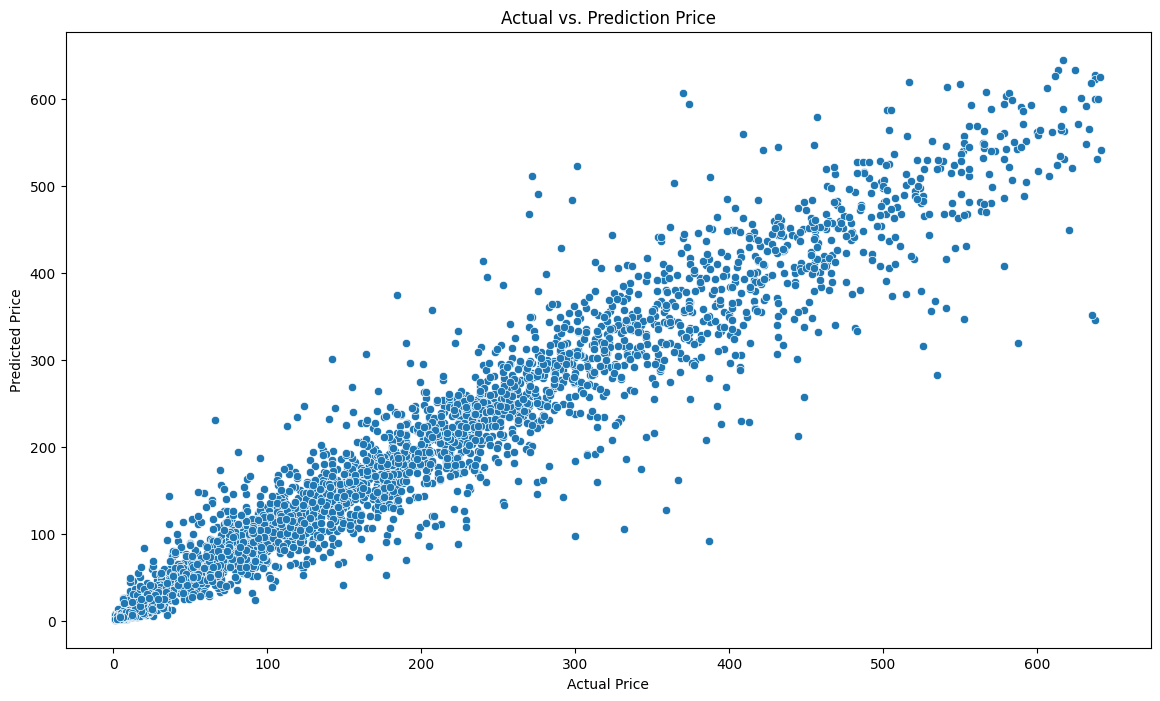

In [66]:
plt.figure(figsize=(14, 8))
plot = sns.scatterplot(x=y_test, y=y_pred_xgb_tuning).set(title='Actual vs. Prediction Price', 
                                               xlabel='Actual Price', 
                                               ylabel='Predicted Price');

**Interpretasi Hasil Performance Comparison**
***
Model mengalami peningkatan performa (nilai RMSE, MAE & MAPE berkurang) dengan dilakukannya hyperparameter tuning, walaupun hanya sedikit (kurang dari 6 persen).
| Metrics | XGBoost (Before Tuning) | XGBoost (After Tuning) | Decrease Percentage|
|---------|-------------------------|------------------------|--------------|
| RMSE    | 42.037373               | 39.900587              | ↓5.08%    |
| MAE     | 25.642264               | 24.23665               | ↓5.48%    |
| MAPE    | 0.255405                | 0.243843               | ↓4.52%    |

Berdasarkan *scatter plot* di atas, secara overall hasil prediksi sudah cukup baik namun masih terdapat beberapa hasil prediksi yang sedikit menyimpang baik lebih tinggi (overestimation) atau lebih rendah (underestimation).

### **Feature Importance**

Untuk menjelaskan fitur apa yang paling mempengaruhi target (count), kita dapat melihatnya melalui Feature Importances sebagai berikut.

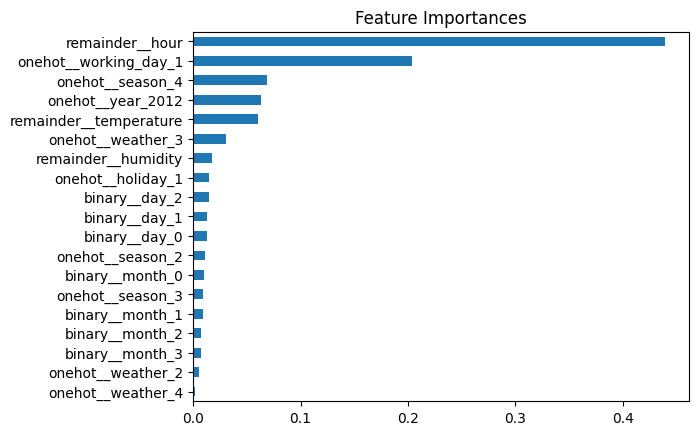

In [67]:
# Plot feature importances
feature_imp = pd.Series(xgb_tuning['model'].regressor_.feature_importances_, transformer.get_feature_names_out()).sort_values(ascending = True)
feature_imp.plot(kind='barh', title='Feature Importances');

**Interpretasi Hasil Feature Importances**
***
Dari bar plot di atas terlihat nilai Feature Importances untuk setiap fitur yang ada. Terlihat bahwa 5 besar fitur dengan Feature Importances tertinggi yaitu:
- 'hour' (jam)
- 'onehot_working_day_1' (hari kerja, bukan weekend maupun holiday)
- 'onehot_season_4' (musim gugur/fall)
- 'onehot_year_2012' (tahun 2012)
- 'temperature' (suhu)
  
Terlihat juga bahwa fitur 'hour' sangat mempengaruhi target (count) karena memiliki nilai Feature Importances yang jauh lebih tinggi dibanding fitur lainnya. 

### **Specific Events and Model Deviations**

In [68]:
df_result = pd.DataFrame({
    'Actual Demand' : y_test,
    'Model Prediction' : [round(a) for a in y_pred_xgb_tuning]
})

df_result

,Actual Demand,Model Prediction
10886,78,77
8523,51,59
3421,270,468
5790,204,196
3113,63,94
...,...,...
6437,336,335
2972,97,73
768,128,146
5126,197,186


In [69]:
df_result['Deviation'] = df_result['Model Prediction'] - df_result['Actual Demand']

In [70]:
pd.merge(df_visual[['date', 'hour', 'day', 'weather']], df_result, left_index=True, right_index=True).sort_values('Deviation')

,date,hour,day,weather,Actual Demand,Model Prediction,Deviation
3861,2012-04-16,7,Monday,Clear,387,91,-296
1333,2012-11-26,8,Monday,Clear,638,345,-293
11910,2012-12-14,8,Friday,Clear,636,351,-285
4274,2012-11-06,8,Tuesday,Clear,588,319,-269
7422,2012-03-21,8,Wednesday,Light Rain/Snow,535,282,-253
...,...,...,...,...,...,...,...
2135,2012-08-19,15,Sunday,Mist,276,490,214
687,2012-11-21,17,Wednesday,Clear,374,593,219
7041,2012-10-28,15,Sunday,Mist,301,523,222
7290,2012-07-18,17,Wednesday,Clear,370,607,237


**Top 5 Underestimation Prediction**
| Date                           | Actual Demand | Model Prediction | Deviation | Event                                                                                                                                                                                                                                                                                                                                       |
|--------------------------------|---------------|------------------|-----------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Senin, 16 April 2012 (7 AM)    | 387           | 91               | -296      | [Pembukaan Kembali Institut Politeknik Virginia Setelah 1 Tahun Tutup Karena Kasus Pembunuhan Masal]( https://www.washingtonpost.com/blogs/campus-overload/post/va-tech-marks-massacre-anniversary-by-returning-to-class/2012/04/16/gIQAesOQLT_blog.html ) |
| Senin, 26 November 2012 (8 AM) | 638           | 345              | -293      |  [Hari Kerja Pertama (Senin) Setelah Libur Panjang (Thanksgiving 22 Nov & Black Friday 23 Nov)](https://learnenglish.britishcouncil.org/general-english/magazine-zone/black-friday-buy-nothing-day#:~:text=Black%20Friday%20is%20the%20day,to%20start%20shopping%20for%20Christmas.)                                                                                                                                                                                                                                                                                                                                           |
| Jumat, 14 Desember 2012 (8 AM) | 636           | 351              | -285      | [Penembakan Masal di Sekolah Dasar Sandy Hook Jumat Pagi](https://www.washingtonpost.com/politics/sandy-hook-elementary-school-shooting-leaves-students-staff-dead/2012/12/14/24334570-461e-11e2-8e70-e1993528222d_story.html)                                                                                                       |
| Selasa, 6 November 2012 (8 AM) | 588           | 319              | -269      | [Pemilihan Umum Presiden Amerika Serikat Periode 2012 - 2017](https://id.wikipedia.org/wiki/Pemilihan_umum_Presiden_Amerika_Serikat_2012)                                                                                                                                                                                            |
| Rabu, 21 Maret 2012 (8 AM)     | 535           | 282              | -253      | [Festival Bunga Sakura Nasional](https://abcnews.go.com/blogs/headlines/2012/03/cherry-blossom-festival-2012-centennial-celebration-of-cherry-tree-arrival-washington-d-c)                                                                                                                                                         |

**Top 5 Overestimation Prediction**
| Date                            | Actual Demand | Model Prediction | Deviation | Event                                                                                                                                                                                                                                           |
|---------------------------------|---------------|------------------|-----------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Minggu, 19 Agustus 2012 (15 PM) | 276           | 490              | 214       | [Gempa di Off Coast Washington D.C 5.2 SR Jam 8 Pagi](https://earthquakescanada.nrcan.gc.ca/recent/2012/20120819.0807/index-en.php)                                                                                                             |
| Rabu, 21 November 2012 (17 PM)  | 374           | 593              | 219       | [Thanksgiving Eve (H-1 Thanksgiving Day)](https://www.calendardate.com/thanksgiving_2012.htm)                                                                                                                                                   |
| Minggu, 28 Oktober 2012 (15 PM) | 301           | 523              | 222       | [Badai Sandy di Washington D.C](https://www.washingtonpost.com/blogs/capital-weather-gang/post/hurricane-sandy-and-washington-dc-detailed-storm-timeline-maps-and-frequent-questions/2012/10/28/2c24af1a-2127-11e2-ac85-e669876c6a24_blog.html) |
| Rabu, 18 Juli 2012 (17 PM)      | 370           | 607              | 237       | [Final Major League Baseball di Great American Ball Park First Pitch Jam 19 PM](https://www.mlb.com/gameday/d-backs-vs-reds/2012/07/18/319093/final/box )                                                                                       |
| Kamis, 16 Juni 2011 (17 PM)     | 272           | 511              | 239       | [Di Data Tertulis Cuaca Kabut (Mist), Aslinya Hujan Gerimis (Light Rain)]()                                                                                                                                                                                        |

***
# **Conclusion**
***

**Exploratory Data Analysis**
- Sebagian besar persewaan adalah untuk perjalanan sehari-hari ke tempat kerja.
- Jam : Hitungan persewaan sepeda sebagian besar berkorelasi dengan waktu dalam sehari. Hitungan mencapai titik tertinggi selama jam sibuk pada hari kerja dan sebagian besar seragam pada siang dan sore hari di luar hari kerja.
- Suhu : Orang umumnya lebih suka bersepeda pada suhu sedang hingga tinggi. Terlihat bahwa jumlah sewa tertinggi antara 32 - 36 derajat Celcius.
- Musim : Terlihat bahwa jumlah persewaan sepeda tertinggi di Musim Semi (Juli hingga September) dan Musim Panas (April hingga Juni) dan terendah di Musim Dingin (Januari hingga Maret).
- Cuaca: Terlihat bahwa jumlah persewaan sepeda tertinggi pada hari yang cerah dan terendah pada hari bersalju atau hujan.
- Kelembaban : Dengan meningkatnya kelembapan, terlihat adanya penurunan jumlah sewa sepeda.
- Pengguna *casual* cenderung lebih sering menyewa sepeda selama waktu santai, sedangkan pengguna *registered* menggunakan sepeda untuk kebutuhan kerja sehari-hari.

**Machine Learning Modeling**
- Model XGBoost Regression mengungguli 4 model regresi lainnya (linear regression, knn regression regression, decision tree regression, random forest regression) dalam hal RMSE, MAE, dan MAPE.
- Dari hasil Benchmark Model dan Hyperparameter Tuning, diperoleh model XGBoost dengan performa terbaik dengan parameter terbaik sebagai berikut:

<center>

| Parameter     | Value          |
|---------------|----------------|
| scaler        | RobustScaler() |
| n_estimators  | 205            |
| max_depth     | 7              |
| learning_rate | 0.1            |

</center>

- Metrik evaluasi yang digunakan pada model ini adalah nilai RMSE, MAE & MAPE. Tidak menggunakan R-squared karena model akhir bukan model linear.

<center>

| Model   | RMSE      | MAE      | MAPE     |
|---------|-----------|----------|----------|
| XGBoost | 39.900587 | 24.23665 | 0.243843 |

</center>

- Nilai RMSE = 39.9 (dibulatkan menjadi 40), maka ini menunjukkan bahwa hasil prediksi model berkisar kurang lebih 40 sepeda dari niali prediksi model dengan nilai maksimum yang dilatih model adalah 645 sepeda.
- Walau kedua metrics (RMSE dan MAE) mengembalikan nilai error yang sama, nilai RMSE lebih tinggi dari MAE karena RMSE lebih sensitif terhadap outlier, dan outlier dalam dataset yang meningkatkan nilai error.
- Nilai MAPE = 24.38, maka ini menunjukkan bahwa rata-rata hasil prediksi model adalah 24,38% dari target.
- Fitur yang paling mempengaruhi target (count) adalah fitur 'hour', diikuti oleh fitur 'onehot_working_day_1'.
- Secara keseluruhan hasil prediksi sudah cukup baik, namun masih terdapat beberapa hasil prediksi yang menyimpang baik lebih tinggi (overestimation) atau lebih rendah (underestimation).
- Menyelidiki beberapa tanggal dan jam tertentu dengan deviasi yang tinggi menunjukkan bahwa ada kejadian khusus yang terjadi pada hari tersebut yang tidak dapat diambil sebagai masukan untuk model, oleh karena itu tidak dapat diwakili oleh model. Contohnya:

<center>

| Type                                  | Date                            | Event                                                                                                                                                                                                                                                          | Impact                                                                                                                                                                                                                                                                                                                                                                      |
|---------------------------------------|---------------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Underestimation (-296 Sepeda)   | Senin, 16 April 2012 (7 AM)     | [ Pembukaan Kembali Institut Politeknik Virginia Setelah 1 Tahun Tutup Karena Kasus Pembunuhan Masal ](  https://www.washingtonpost.com/blogs/campus-overload/post/va-tech-marks-massacre-anniversary-by-returning-to-class/2012/04/16/gIQAesOQLT_blog.html  ) | Karena limitasi data yang hanya ada 2 tipe tahun (2011 dan 2012), sedangkan pada bulan yang sama di tahun 2011 terjadi peristiwa penembakan masal di Institut Politeknik Virginia hingga sempat ditutup. Mesin tidak dapat memprediksi pembukaan kembali suatu institut yang tutup. Hal ini berpengaruh pada jumlah sewa bike-share yang meningkat pesat di hari pembukaan. |
| Overestimation (+214 Sepeda) | Minggu, 19 Agustus 2012 (15 PM) | [ Gempa di Off Coast Washington D.C 5.2 SR Jam 8 Pagi ]( https://earthquakescanada.nrcan.gc.ca/recent/2012/20120819.0807/index-en.php )                                                                                                                        | Terjadinya gempa pada hari minggu pagi, menyebabkan orang-orang lebih waspada terhadap gempa susulan dan lebih memilih untuk berdiam dirumah dan memastikan keadaan luar aman terlebih dahulu. Mesin juga tidak bisa memprediksi bencana alam yang datang. Hal ini berpengaruh pada penurunan jumlah sewa sepeda.                                                           |

</center>

- Permintaan sistem berbagi sepeda sangat bergantung pada musim dan kondisi lingkungan yang membuatnya dapar diprediksi menggunakan model pembelajaran mesin (*Machine Learning*).
- Model ini juga dapat digunakan untuk deteksi peristiwa dan anomali seperti yang sudah dijelaskan diatas.

**Limitation**

- Project ini memiliki beberapa keterbatasan karena selalu ada outlier dalam praktiknya dan model mungkin gagal memprediksinya.
- Datanya hanya 2 tahun (2011 - 2012) sehingga hanya dapat menunjukan pola 2 tahun. 
- Kejadian harian yang dilaporkan merupakan faktor spesifik yang dapat bervariasi, adanya beberapa kejadian di hari itu yang tidak ada laporannya kepada publik dapat membatasi dalam interpretasi anomali.

***
# **Recommendation**
***

**Dari Sisi Bisnis**
- Saat merencanakan sepeda tambahan ke stasiun, jam sewa puncak harus dipertimbangkan, yaitu 7–9 pagi dan 5–6 sore.
- Sebagian besar persewaan adalah untuk pergi bekerja setiap hari. Jadi tim operasional harus meluncurkan lebih banyak stasiun di dekat gedung kerja untuk menjangkau pelanggan utama mereka.
- Disarankan adanya diskon musiman untuk mengandalkan perubahan musim dan memprioritaskan pesepeda di musim gugur dan musim dingin yang jumlahnya sedikit peminatnya.
- Adanya data tentang rute yang paling banyak digunakan dapat membantu membangun jalur khusus sepeda.
- Dikarenakan rendahnya penggunaan sepeda pada malam hari, sebaiknya dilakukan perawatan sepeda pada malam hari.
- Mengubah pelanggan terdaftar menjadi pelanggan biasa di akhir pekan dengan memberi mereka diskon dan kupon dapat menaikan profit perusahaan.

**Dari Sisi Teknis (Machine Learning Modeling)**
- Penambahan fitur stasiun karena setiap stasiun tentunya memiliki persyaratan yang berbeda, sehingga dengan adanya fitur ini akan meningkatkan kualitas prediksi model.
- Setelah penambahan fitur, model ini juga dapat digunakan untuk pengembangan model seperti model prediksi permintaan sepeda di setiap stasiun dengan melihat karakteristik masing-masing stasiun. 
- Penambahan data pada cuaca Heavy Rain/Snow, karena datanya hanya ada 3.
- Penambahan data di tahun lain yang berbeda seperti kumpulan data dari tahun 2011-2016 dapat meningkatkan kualitas prediksi model.
- Penggunaan model timeseries forecasting seperti Simple Moving Average (SMA), Exponential Smoothing (SES), Autoregressive Integration Moving Average (ARIMA), dan Neural Network (NN) dapat dicoba digunakan.

***
# **Save Model**
***

In [71]:
# Import Model
import pickle

final_model = random_search_xgb.best_estimator_.fit(X_train, y_train)

pickle.dump(final_model, open('bike_sharing_xgb_final_model.sav', 'wb'))

In [72]:
# Load Model
filename = 'bike_sharing_xgb_final_model.sav'
loaded_model = pickle.load(open(filename, 'rb'))

In [73]:
# Hasil RMSE pada Test Set Menggunakan Model yang Telah Disimpan
np.sqrt(mean_squared_error(y_test, loaded_model.predict(X_test)))

39.90058668781851